In [55]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

from skimage.morphology import dilation, erosion, opening, closing, footprint_rectangle

# Operadores de apertura y cierre

## Cargue y visualice la imagen amour.png.

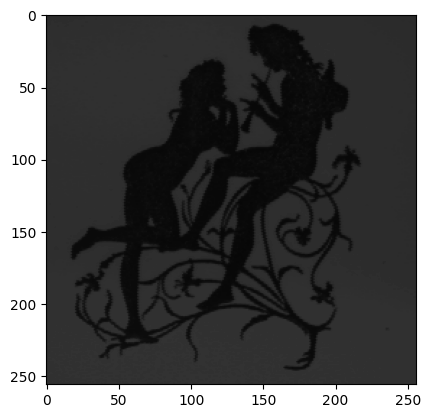

In [56]:
amour = cv2.imread('images/amour.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(amour, cmap='gray', vmin=0, vmax=255)
plt.show()

## Realice la operación de apertura usando una máscara cuadrada de tamaño 5x5. ¿Qué partes fueron suprimidas? Nota: No es lo mismo aplicar dos veces seguidas la operación de apertura con una máscara de 3x3 que una sola vez con una máscara de 5x5. Hacer una segunda apertura no sirve de nada (no produce ningún efecto) ya que la operación de apertura es idempotente, es decir: apertura(apertura(imagen, máscara)) = apertura(imagen, máscara).

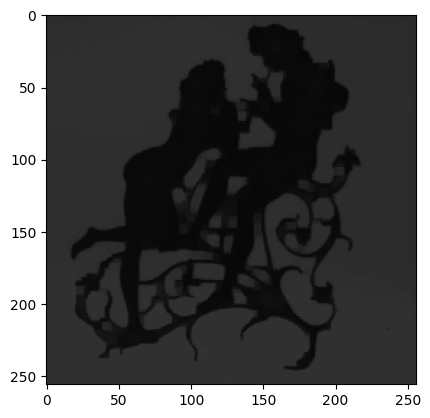

In [57]:
apertura_amour = opening(amour, footprint=footprint_rectangle((5,5)) )
plt.imshow(apertura_amour, cmap='gray', vmin=0, vmax=255)
plt.show()

La imagen se conserva bien, solo se han suprimido algunos elementos pequeños de forma ligera. Por ejemplo, no se distingue ahora el instrumento que toca el hombre de la imagen.

## Retome la imagen original, y aplique una umbralización para binarizarla (umbral = 35).

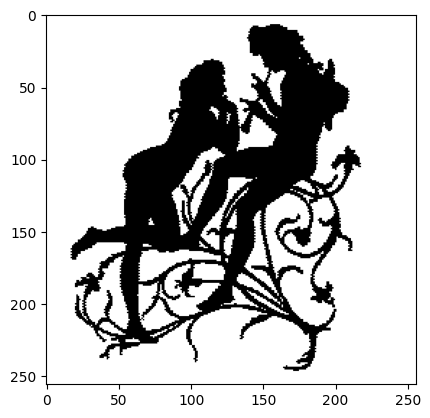

In [58]:
thres_value, thres_amour= cv2.threshold(amour, 35, 255, cv2.THRESH_BINARY)
plt.imshow(thres_amour, cmap='gray', vmin=0, vmax=255)
plt.show()

Realice el cierre de la imagen. Para esto, efectúe 4 cierres aplicando sucesivamente las 4 máscaras lineales simétricas de tamaño 1x3 (en este orden: las dos diagonales ( / y después \ ), horizontal ( - ) y vertical ( | )). 

Las máscaras diagonales (u oblicuas) deben crearse generando una matriz de 3x3 y colocando 1’ s sobre las diagonales. Los demás elementos se deben dejar vacíos (SIN CEROS).

La máscara horizontal debe crearse generando una matriz de 3x1 llena de 1’s.

La máscara vertical debe crearse generando una matriz de 1x3 llena de 1’s.

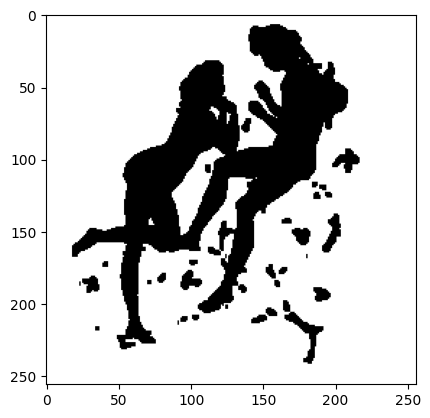

In [59]:
k1 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]], dtype=np.uint8)
k2 = np.array([[0, 0, 1], [0, 1, 0], [1, 0, 0]], dtype=np.uint8)

k3 = np.ones((1, 3), dtype=np.uint8)
k4 = np.ones((3, 1), dtype=np.uint8)

amour_ = closing(thres_amour, footprint=k2)
amour_ = closing(amour_, footprint=k1)
amour_ = closing(amour_, footprint=k3)
amour_ = closing(amour_, footprint=k4)

plt.imshow(amour_, cmap='gray', vmin=0, vmax=255)
plt.show()

## ¿Cuál es el efecto obtenido?

Se obtuvo una separación del elemento sobre el cual están sentadas las personas de las fotos, y estas se mantienen intactas.

## Tome el negativo de la imagen resultado, de forma tal que las figuras se vuelvan blancas.

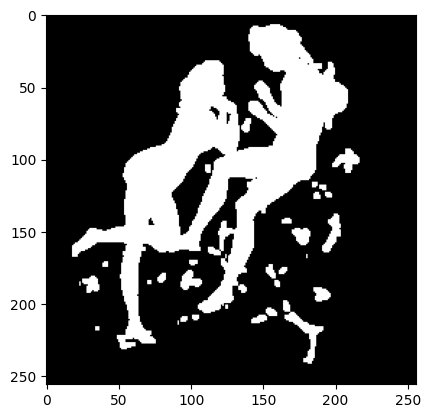

In [60]:
amour__ = 255 - amour_
plt.imshow(amour__, cmap='gray', vmin=0, vmax=255)
plt.show()

## Seleccione el componente conexo más grande. ¿Cuál es el resultado?

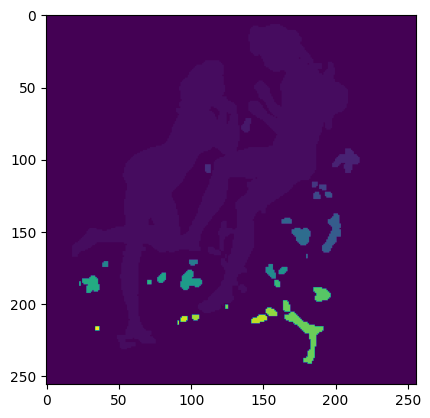

In [61]:
from skimage.measure import label

connected_components = label(amour__, background=0, connectivity=2)
plt.imshow(connected_components)
plt.show()